In [38]:
import os
import numpy as np
import torch
from torchvision.io import read_image
from torch.utils.data import DataLoader, SubsetRandomSampler
from PIL import Image
import matplotlib.pyplot as plt
import albumentations as A
from tqdm import tqdm

import sys

In [2]:
sys.path.insert(1, '/root/hackathon_internals/')

In [29]:
from model import UNet
from dataset import LitographyDataset
from scorer import compute_metric_pair

In [32]:
GPU = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(GPU)

cuda


In [33]:
unet_model = UNet() 
unet_model.load_state_dict(torch.load('weights/UNET_5EPOCHS_BCE_NO_SCHED.pth'))
unet_model = unet_model.to(device=GPU)

In [40]:
img_dir = '/root/datasets/test/images/'
mask_dir = '/root/datasets/test/labels/'

In [41]:
dataset = LitographyDataset(img_dir, mask_dir)

In [42]:
f1_list = []
acc_list = []

for img, mask in tqdm(dataset):
    mask = mask[None, :]
    mask = mask.to(dtype=torch.long).numpy()

    img = img[None, :].to(device=GPU)
    logits = unet_model(img)
    probas = torch.sigmoid(logits)
    pred = (probas>0.5).to(dtype=torch.long).cpu().numpy()

    f1, accuracy = compute_metric_pair(pred, mask)
    f1_list.append(f1)
    acc_list.append(accuracy)

100%|██████████| 1000/1000 [02:28<00:00,  6.71it/s]


(array([  1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   1.,
          7.,   1.,   1.,   1.,   1.,   0.,   0.,   1.,   1.,   2.,   0.,
          4.,   4.,   6.,   9.,   4.,   8.,   7.,   4.,   4.,   9.,   7.,
          8.,  11.,   9.,  12.,  17.,  21.,  20.,  21.,  31.,  35.,  61.,
        114., 159., 141., 103., 106.,  45.]),
 array([0.78955834, 0.79368583, 0.79781332, 0.80194081, 0.8060683 ,
        0.81019579, 0.81432328, 0.81845077, 0.82257826, 0.82670575,
        0.83083324, 0.83496073, 0.83908822, 0.84321571, 0.8473432 ,
        0.85147069, 0.85559818, 0.85972567, 0.86385316, 0.86798065,
        0.87210814, 0.87623563, 0.88036312, 0.88449061, 0.8886181 ,
        0.89274559, 0.89687308, 0.90100057, 0.90512806, 0.90925555,
        0.91338304, 0.91751053, 0.92163802, 0.92576551, 0.929893  ,
        0.93402049, 0.93814799, 0.94227548, 0.94640297, 0.95053046,
        0.95465795, 0.95878544, 0.96291293, 0.96704042, 0.97116791,
        0.9752954 , 0.97942289, 0.98355038, 0.

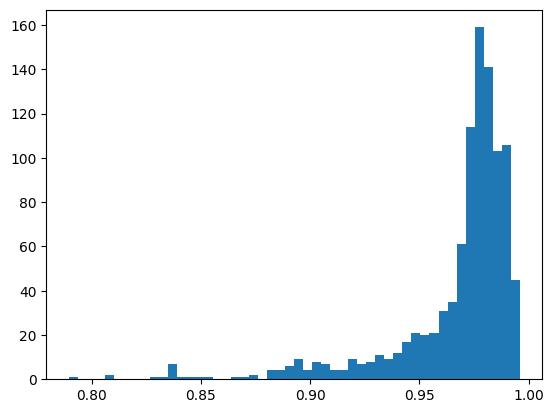

In [74]:
plt.hist(f1_list, bins=50)

In [57]:
np.argmin(f1_list)

463

In [58]:
img, mask = dataset[463]

In [67]:
img_t = img[None, :].to(device=GPU)
logits = unet_model(img_t)
probas = torch.sigmoid(logits)
pred = (probas>0.5).to(dtype=torch.long).cpu().numpy()

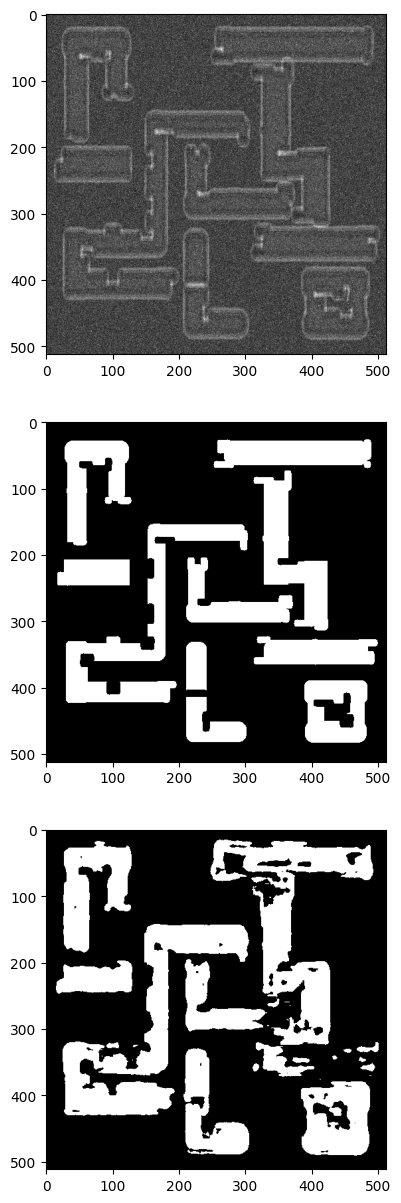

In [71]:
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.imshow(img[0].numpy(), cmap="gray")
plt.subplot(3, 1, 2)
plt.imshow(mask[0].numpy(), cmap="gray")
plt.subplot(3, 1, 3)
plt.imshow(pred[0][0], cmap="gray")